In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path


## Problem 4: 
- Write a code that converts cartesian coordinate vectors (**r, v**) to orbital elements:
    - semimajor axis (a)
    - eccentricity (e)
    - inclination (I)
    - longitude of ascending node ($\Omega$)
    - argument of periapsis ($\omega$)
    - true anomaly (*f*) 


In [83]:
filename = 'id000003-XV' #later cell will use this to assign dataframes for each planet

source_path = '/Users/mmijjum/Desktop/third_year/Jupyter_Notebooks/module05-prob04-xv2el-mmijjum/data/module05_data/filename.csv'
target_path = source_path.replace("/filename.csv", "/id000003-XV.csv", 1) #UPDATE - for reading correct csv INPUTS

source_path2 = '/Users/mmijjum/Desktop/third_year/Jupyter_Notebooks/module05-prob04-xv2el-mmijjum/data/filename2.csv'
target_path2 = source_path2.replace("/filename2.csv", "/id000003_EL.csv", 1) #UPDATE - for saving csv OUTPUTS

source_path3 = '/Users/mmijjum/Desktop/third_year/Jupyter_Notebooks/module05-prob04-xv2el-mmijjum/plots/filename3.png'
target_path3 = source_path3.replace("/filename3.png", "/a_vs_t_03.png", 1) #UPDATE - for saving a vs t plots

source_path4 = '/Users/mmijjum/Desktop/third_year/Jupyter_Notebooks/module05-prob04-xv2el-mmijjum/plots/filename4.png'
target_path4 = source_path3.replace("/filename4.png", "/i_vs_t_03.png", 1) #UPDATE - for saving i vs t plots

#Mercury:id000002-XV
#Venus:id000003-XV
#Earth:id000004-XV
#Mercury:id000005-XV
#Jupiter:id000006-XV
#Saturn:id000007-XV
#Uranus:id000008-XV
#Neptune:id000009-XV
#Pluto:id000010-XV

In [84]:
##From here, cell > run all" 

In [85]:
df = pd.DataFrame(pd.read_csv(target_path))

In [86]:
x = df['xh']
y = df['yh']
z = df['zh']

vx = df['vxh']
vy = df['vyh']
vz = df['vz']

t = df[' t'] #note, .csv had a space before 't' so had to include this so it knew which header to call.
t = t.values.tolist()
hvector = []
for i in range(len(x)):
    rvector = [x[i],y[i],z[i]]
    vvector = [vx[i],vy[i],vz[i]]

    htemp = np.cross(rvector,vvector)
    hvector.append(htemp)

h_df = pd.DataFrame(hvector)

hx = h_df[0]
hy = h_df[1]
hz = h_df[2]
h = []
for i in range(len(hx)):
    htemp = np.sqrt(hx[i]**2 + hy[i]**2 + hz[i]**2)
    h.append(htemp)
len(h)

1001

In [87]:
r = []
v = []
for i in range(len(df)):
    rtemp = np.sqrt(x.iloc[i]**2 + y.iloc[i]**2 +z.iloc[i]**2)
    vtemp = np.sqrt(vx.iloc[i]**2 + vy.iloc[i]**2 + vz.iloc[i]**2)
    r.append(rtemp)
    v.append(vtemp)
#r
#v

In [88]:
#Semimajor axis (a)
G = 6.67428 * 10**(-11) #m3/kg s2
M = 1.9891 * 10**(30) #kg
mu = 1
a = []

for i in range(len(r)):
    atemp = ((2/r[i]) - (v[i]**2/mu))**(-1) #eqn 2.134 
    a.append(atemp)
#a

In [89]:
#eccentricity
e = []
for i in range(len(a)):
    etemp = np.sqrt(1 - (h[i]**2/(mu*a[i])))
    e.append(etemp)

In [90]:
#Inclination
inc = []
for i in range(len(h)):
    inctemp = np.arccos((hz[i]/h[i]))
    inc.append(inctemp)
inc = np.rad2deg(inc)
inc

array([3.39466895, 3.38267337, 3.36429064, ..., 1.20136629, 1.26632867,
       1.33310386])

In [91]:
#longitude of ascending node
omega = []
for i in range(len(hx)):
    omegatemp = np.arcsin(hx[i]/h[i] * np.sin(inc[i]))
    omega.append(omegatemp)
omega = np.rad2deg(omega)

In [92]:
#true anomaly (f)
f = []
for i in range(len(a)):
    ftemp = np.arccos((1/e[i]) * ((a[i]*(1-e[i]**2))/r[i]) - 1)
    f.append(ftemp)

In [93]:
# argument of periapsis
w = []
for i in range(len(f)):
    wtemp = np.arcsin(z.tolist()[i]/r[i]*np.sin(inc[i])) + f[i]
    w.append(wtemp)

In [94]:
filename

'id000003-XV'

# Save .csv's with relevant data

In [95]:
if filename == 'id000002-XV': 

    id000002_EL_df = pd.DataFrame(
        {'t':t,
         'a':a,
         'e':e,
         'inclination':inc,
         'lon_asc_node':omega,
         'arg_peri':w,
         'true_anom':f,
        })


id000002_EL_df.to_csv('target_path2',header = True)

In [96]:
if filename == 'id000003-XV': 

    id000003_EL_df = pd.DataFrame(
        {'t':t,
         'a':a,
         'e':e,
         'inclination':inc,
         'lon_asc_node':omega,
         'arg_peri':w,
         'true_anom':f,
        })


    id000003_EL_df.to_csv('target_path2',header = True)

In [97]:
if filename == 'id000004-XV': 

    id000004_EL_df = pd.DataFrame(
        {'t':t,
         'a':a,
         'e':e,
         'inclination':inc,
         'lon_asc_node':omega,
         'arg_peri':w,
         'true_anom':f,
        })


    id000004_EL_df.to_csv('target_path2',header = True)

In [98]:
if filename == 'id000005-XV': 

    id000005_EL_df = pd.DataFrame(
        {'t':t,
         'a':a,
         'e':e,
         'inclination':inc,
         'lon_asc_node':omega,
         'arg_peri':w,
         'true_anom':f,
        })


    id000005_EL_df.to_csv('target_path2',header = True)

In [99]:
if filename == 'id000006-XV': 

    id000006_EL_df = pd.DataFrame(
        {'t':t,
         'a':a,
         'e':e,
         'inclination':inc,
         'lon_asc_node':omega,
         'arg_peri':w,
         'true_anom':f,
        })


    id000006_EL_df.to_csv('target_path2',header = True)

In [100]:
if filename == 'id000007-XV': 

    id000007_EL_df = pd.DataFrame(
        {'t':t,
         'a':a,
         'e':e,
         'inclination':inc,
         'lon_asc_node':omega,
         'arg_peri':w,
         'true_anom':f,
        })


    id000007_EL_df.to_csv('target_path2',header = True)

In [101]:
if filename == 'id000008-XV': 

    id000008_EL_df = pd.DataFrame(
        {'t':t,
         'a':a,
         'e':e,
         'inclination':inc,
         'lon_asc_node':omega,
         'arg_peri':w,
         'true_anom':f,
        })


    id000008_EL_df.to_csv('target_path2',header = True)

In [102]:
if filename == 'id000009-XV': 

    id000009_EL_df = pd.DataFrame(
        {'t':t,
         'a':a,
         'e':e,
         'inclination':inc,
         'lon_asc_node':omega,
         'arg_peri':w,
         'true_anom':f,
        })


    id000009_EL_df.to_csv('target_path2',header = True)

In [103]:
if filename == 'id000010-XV': 

    id000010_EL_df = pd.DataFrame(
        {'t':t,
         'a':a,
         'e':e,
         'inclination':inc,
         'lon_asc_node':omega,
         'arg_peri':w,
         'true_anom':f,
        })


    id000010_EL_df.to_csv('target_path2',header = True)

In [104]:
#keywords that the next cell will check the filepath contains before it runs plots.
substring2 = 'id000002-XV'
substring3 = 'id000003-XV'
substring4 = 'id000004-XV'
substring5 = 'id000005-XV'
substring6 = 'id000006-XV'
substring7 = 'id000007-XV'
substring8 = 'id000008-XV'
substring9 = 'id000009-XV'
substring10 = 'id000010-XV'


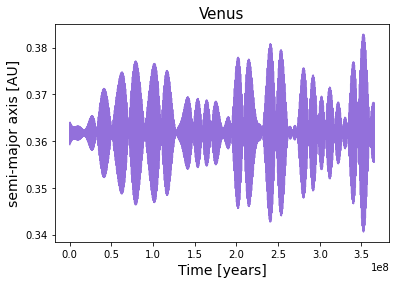

In [105]:
if target_path.find(substring2) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Mercury', fontsize = 15)
    plt.plot(id000002_EL_df['t'], id000002_EL_df['a'], c = 'mediumpurple')
    plt.savefig(target_path3, dpi = 300, bbox_inches='tight')

if target_path.find(substring3) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Venus', fontsize = 15)
    plt.plot(id000003_EL_df['t'], id000003_EL_df['a'], c = 'mediumpurple')
    plt.savefig(target_path3, dpi = 300, bbox_inches='tight')

if target_path.find(substring4) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Earth', fontsize = 15)
    plt.plot(id000004_EL_df['t'], id000004_EL_df['a'], c = 'mediumpurple')
    plt.savefig(target_path3, dpi = 300, bbox_inches='tight')

if target_path.find(substring5) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Mars', fontsize = 15)
    plt.plot(id000005_EL_df['t'], id000005_EL_df['a'], c = 'mediumpurple')
    plt.savefig(target_path3, dpi = 300, bbox_inches='tight')

if target_path.find(substring6) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Jupiter', fontsize = 15)
    plt.plot(id000006_EL_df['t'], id000006_EL_df['a'], c = 'mediumpurple')
    plt.savefig('/Users/mmijjum/Desktop/third_year/Jupyter_Notebooks/module05-prob04-xv2el-mmijjum/plots/a_vs_t_06.png', dpi = 300, bbox_inches='tight')

if target_path.find(substring7) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Saturn', fontsize = 15)
    plt.plot(id000007_EL_df['t'], id000007_EL_df['a'], c = 'mediumpurple')
    plt.savefig(target_path3, dpi = 300, bbox_inches='tight')

if target_path.find(substring8) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Uranus', fontsize = 15)
    plt.plot(id000008_EL_df['t'], id000008_EL_df['a'], c = 'mediumpurple')
    plt.savefig(target_path3, dpi = 300, bbox_inches='tight')

if target_path.find(substring9) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Neptune', fontsize = 15)
    plt.plot(id000009_EL_df['t'], id000009_EL_df['a'], c = 'mediumpurple')
    plt.savefig(target_path3, dpi = 300, bbox_inches='tight')

if target_path.find(substring10) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Pluto', fontsize = 15)
    plt.plot(id000010_EL_df['t'], id000010_EL_df['a'], c = 'mediumpurple')
    plt.savefig(target_path3, dpi = 300, bbox_inches='tight')


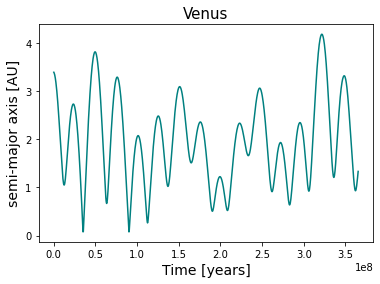

In [106]:
if target_path.find(substring2) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Mercury', fontsize = 15)
    plt.plot(id000002_EL_df['t'], id000002_EL_df['inclination'], c = 'teal')
    plt.savefig(target_path4, dpi = 300, bbox_inches='tight')

if target_path.find(substring3) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Venus', fontsize = 15)
    plt.plot(id000003_EL_df['t'], id000003_EL_df['inclination'], c = 'teal')
    plt.savefig(target_path4, dpi = 300, bbox_inches='tight')

if target_path.find(substring4) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Earth', fontsize = 15)
    plt.plot(id000004_EL_df['t'], id000004_EL_df['inclination'], c = 'teal')
    plt.savefig(target_path4, dpi = 300, bbox_inches='tight')

if target_path.find(substring5) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Mars', fontsize = 15)
    plt.plot(id000005_EL_df['t'], id000005_EL_df['inclination'], c = 'teal')
    plt.savefig(target_path4, dpi = 300, bbox_inches='tight')

if target_path.find(substring6) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Jupiter', fontsize = 15)
    plt.plot(id000006_EL_df['t'], id000006_EL_df['inclination'], c = 'teal')
    plt.savefig(target_path4, dpi = 300, bbox_inches='tight')

if target_path.find(substring7) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Saturn', fontsize = 15)
    plt.plot(id000007_EL_df['t'], id000007_EL_df['inclination'], c = 'teal')
    plt.savefig(target_path4, dpi = 300, bbox_inches='tight')

if target_path.find(substring8) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Uranus', fontsize = 15)
    plt.plot(id000008_EL_df['t'], id000008_EL_df['inclination'], c = 'teal')
    plt.savefig(target_path4, dpi = 300, bbox_inches='tight')

if target_path.find(substring9) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Neptune', fontsize = 15)
    plt.plot(id000009_EL_df['t'], id000009_EL_df['inclination'], c = 'teal')
    plt.savefig(target_path4, dpi = 300, bbox_inches='tight')

if target_path.find(substring10) != -1:
    plt.xlabel('Time [years]', fontsize = 14)
    plt.ylabel('semi-major axis [AU]', fontsize = 14)
    plt.title('Pluto', fontsize = 15)
    plt.plot(id000010_EL_df['t'], id000010_EL_df['inclination'], c = 'teal')
    plt.savefig(target_path4, dpi = 300, bbox_inches='tight')
